In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime

In [ ]:
data = pd.read_excel("/ECOMM DATA.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
data.shape

(51290, 24)

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
# Lets drop the less relevent columns from data
data_1 = data.drop(columns = ["Row ID","Customer Name","Postal Code","Product ID"])

In [ ]:
data_1.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
#EDA : Explorarty data analysis to check the missing vaue, varience, duplicates and also outliers if we need
# We can do it sepratly or we can use "sweetviz" librar for this as below
!pip install sweetviz

import sweetviz
myreport = sweetviz.analyze(data_1)
myreport.show_html("Report_html")

                                             |          | [  0%]   00:00 -> (? left)

Report Report_html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data_1.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
# Product with heighest number of sales
high_sales = data_1.groupby('Product Name').agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False)[:10]
high_sales

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<ipython-input-30-3361e04587aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Product Name', y = 'Quantity', data = high_sales.reset_index(), palette = 'muted')


<function matplotlib.pyplot.show(close=None, block=None)>

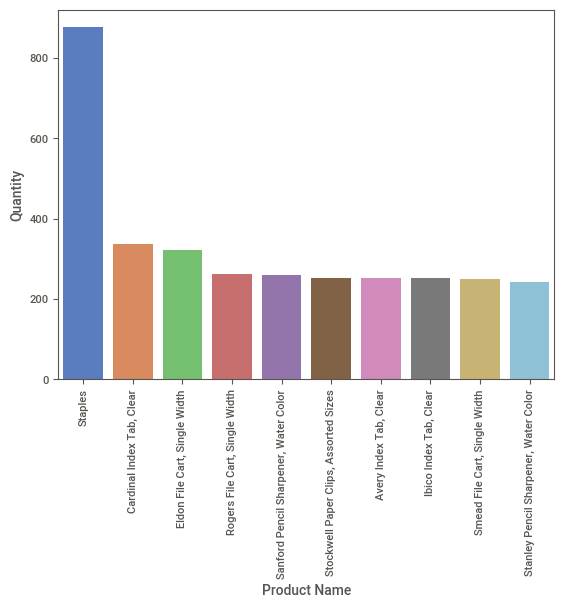

In [ ]:
# Visulizing above finding
sns.barplot(x = 'Product Name', y = 'Quantity', data = high_sales.reset_index(), palette = 'muted')
plt.xticks(rotation = 'vertical')
plt.show

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Market          51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Category        51290 non-null  object        
 12  Sub-Category    51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sales           51290 non-null  int64         
 15  Qu

In [ ]:
# Top 10 products with heighest sales
high_sales_prd = pd.DataFrame(data_1.groupby('Product Name')['Sales'].sum())
high_sales_prd.sort_values(by = ['Sales'], inplace=True, ascending = False)
high_sales_prd.head(10)


,Sales
Product Name,
"Apple Smart Phone, Full Size",86921
"Cisco Smart Phone, Full Size",76424
"Motorola Smart Phone, Full Size",73132
"Nokia Smart Phone, Full Size",71884
Canon imageCLASS 2200 Advanced Copier,61595
"Hon Executive Leather Armchair, Adjustable",58168
"Office Star Executive Leather Armchair, Adjustable",50634
"Harbour Creations Executive Leather Armchair, Adjustable",50102
"Samsung Smart Phone, Cordless",48648


In [ ]:
  Profitable_prd = pd.DataFrame(data_1.groupby(['Product Name'])['Profit'].sum())
  Profitable_prd.sort_values(by =['Profit'], inplace = True, ascending = False)
  Profitable_prd.head(10)

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


##Total Sales

In [ ]:
Total_sales = sum(data_1['Sales'])
Total_sales

12616046

##Best Selling Product


<ipython-input-63-fa7a8c4da514>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Product Name', y = 'Profit', data = Profitable_prd.head(10),palette = 'muted')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

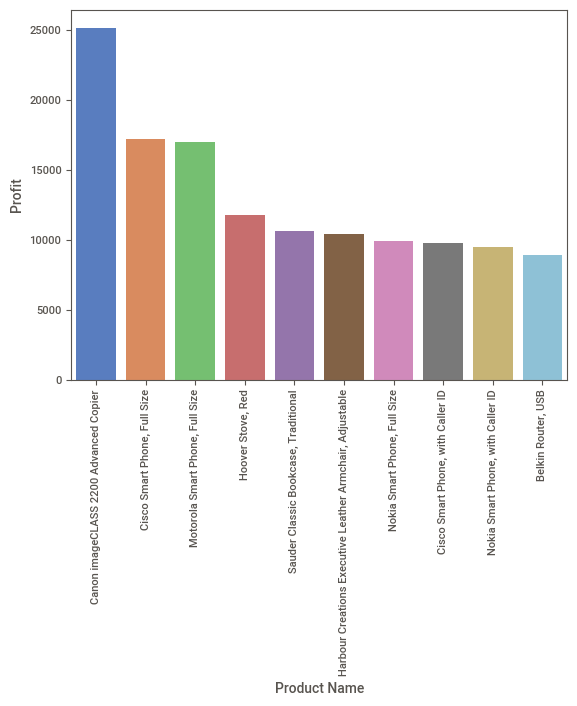

In [ ]:
sns.barplot(x = 'Product Name', y = 'Profit', data = Profitable_prd.head(10),palette = 'muted')
plt.xticks(rotation = 'vertical')

In [ ]:
# Categories with higest sales
Profitable_category = pd.DataFrame(data_1.groupby(['Category'])['Sales'].sum())
Profitable_category.sort_values(by = 'Sales', inplace=True, ascending = False)
Profitable_category

,Sales
Category,
Technology,4739096
Furniture,4105877
Office Supplies,3771073


<Axes: xlabel='Category', ylabel='Sales'>

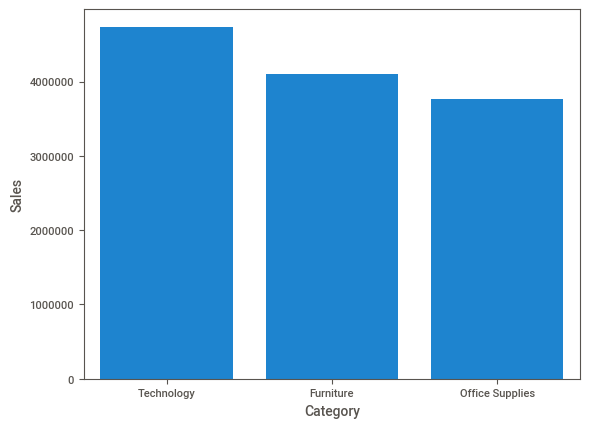

In [ ]:
sns.barplot(x = 'Category', y = 'Sales', data = Profitable_category)

In [ ]:
data_1.groupby(['Category', 'Sub-Category'], as_index = False)['Quantity'].count()

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


In [ ]:
# Profiable customer segment
Profitable_Segment = pd.DataFrame(data_1.groupby(['Segment'])['Profit'].sum())
Profitable_Segment.sort_values(by ='Profit', inplace = True, ascending = False)
Profitable_Segment

,Profit
Segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


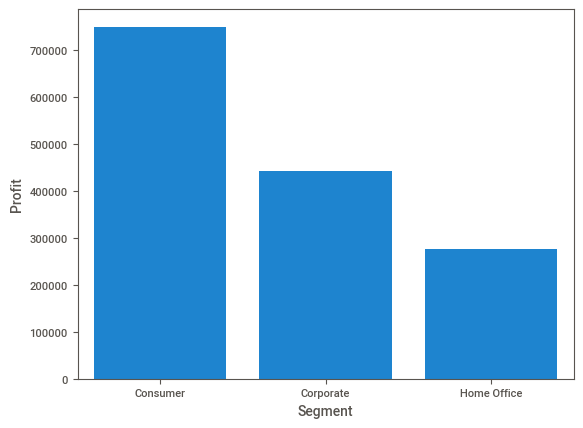

In [ ]:
sns.barplot(x = 'Segment', y = 'Profit', data = Profitable_Segment.reset_index())
plt.xticks = 'vertical'

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Market          51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Category        51290 non-null  object        
 12  Sub-Category    51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sales           51290 non-null  int64         
 15  Qu

In [ ]:
# Total sales ales trends over time
#add moth column

month = data_1['Order Date'].astype('str')
month = month.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
data_1['Month'] = month.map(lambda x : x.month)

data_1['year'] = data_1['Order Date'].dt.year
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Market          51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Category        51290 non-null  object        
 12  Sub-Category    51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sales           51290 non-null  int64         
 15  Qu

In [ ]:
data_1['Month'] = data_1['Month'].astype('int64')
data_1['year'] = data_1['year'].astype('int64')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Market          51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Category        51290 non-null  object        
 12  Sub-Category    51290 non-null  object        
 13  Product Name    51290 non-null  object        
 14  Sales           51290 non-null  int64         
 15  Qu

In [ ]:
# Profiable customer segment

Profitable_year = pd.DataFrame(data_1.groupby(['year'])['Profit'].sum())
Profitable_year.sort_values(by = 'Profit', inplace = True, ascending = False)
Profitable_year

#Profitable_Segment = pd.DataFrame(data_1.groupby(['Segment'])['Profit'].sum())
#Profitable_Segment.sort_values(by ='Profit', inplace = True, ascending = False)
#Profitable_Segment

,Profit
year,
2014,504165.97046
2013,406935.23018
2012,307415.27910
2011,248940.81154


## Sales Trend Over Time

<ipython-input-133-774c8aed097c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'year', y = 'Profit', data = Profitable_year.reset_index(), palette = 'muted')


<Axes: xlabel='year', ylabel='Profit'>

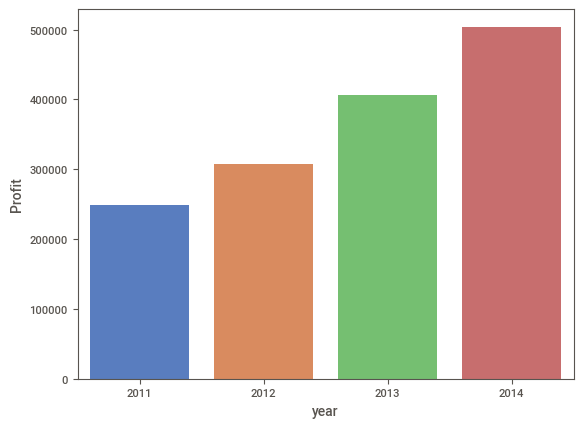

In [ ]:
sns.barplot(x = 'year', y = 'Profit', data = Profitable_year.reset_index(), palette = 'muted')

In [ ]:
Profiatable_Month = pd.DataFrame(data_1.groupby(['Month'])['Profit'].sum())
Profiatable_Month.sort_values(by = 'Profit', inplace = True, ascending = False)
Profiatable_Month

,Profit
Month,
11,175449.48412
12,170718.12710
9,170438.18316
10,157269.35838
8,151854.10972
6,147079.41684
5,104509.78428
3,94087.52096
7,78070.09172


<ipython-input-135-c056017451a8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Month', y = 'Profit', data = Profiatable_Month.reset_index(), palette = 'muted')


<Axes: xlabel='Month', ylabel='Profit'>

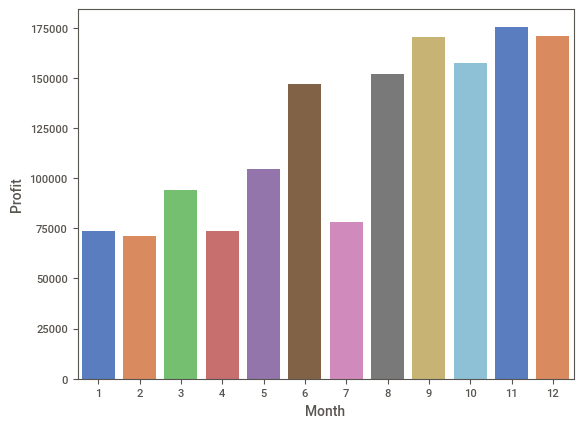

In [ ]:
sns.barplot(x = 'Month', y = 'Profit', data = Profiatable_Month.reset_index(), palette = 'muted')

# Conclusion

#### Total Sales is : 12616046

#### Sales trends over time : We can see that in sales are high in year 2015 and in month of November

#### The best-selling products is "Canon imageCLASS 2200 Advanced Copier"